In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from google.colab import files
import io
from matplotlib import cm

In [0]:
uploaded = files.upload()

In [0]:
df = pd.read_csv(io.BytesIO(uploaded['codings.csv']))

In [0]:
features = ['cv_'+str(i+1) for i in range(37)]
# Separating out the features
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

y = df.loc[:,['genre']].values

In [0]:
x = np.nan_to_num(x)

# Two component PCA

In [0]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [0]:
finalDf = pd.concat([principalDf, df['genre']], axis = 1)

In [0]:
colors = cm.get_cmap('viridis', 1873)

In [64]:
colors.colors

array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.267004, 0.004874, 0.329415, 1.      ],
       [0.267004, 0.004874, 0.329415, 1.      ],
       ...,
       [0.993248, 0.906157, 0.143936, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])

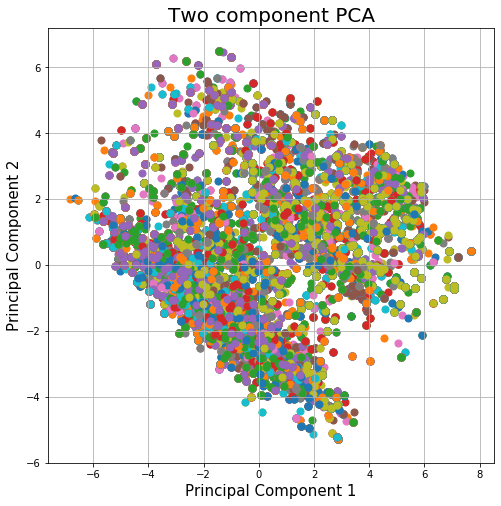

In [85]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Two component PCA', fontsize = 20)
targets = df['genre']
for target, color in zip(targets,colors.colors):
    indicesToKeep = finalDf['genre'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , cmap = color
               , s = 50)
# ax.legend(targets)
ax.grid()

In [74]:
pca.explained_variance_ratio_

array([0.19056403, 0.12733329])

# Three Component PCA

In [0]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

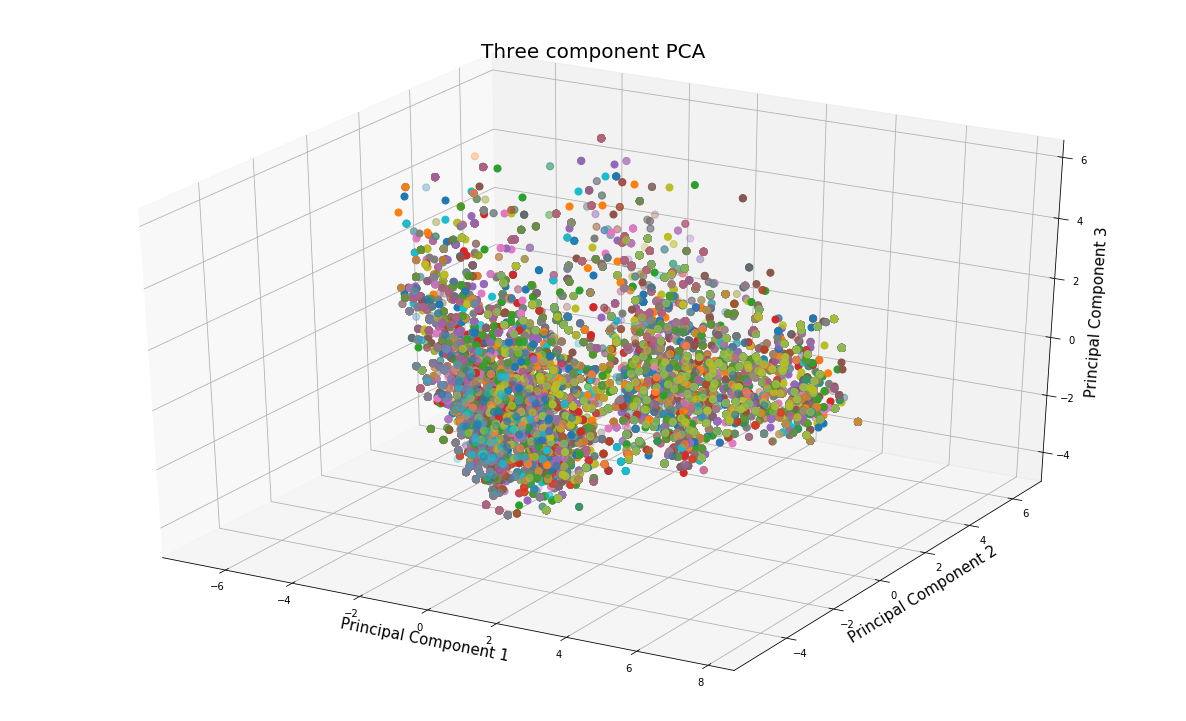

In [86]:
fig = plt.figure(figsize=(21,13))
ax = plt.axes(projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('Three component PCA', fontsize = 20)
for target, color in zip(targets,colors.colors):
  indicesToKeep = finalDf['genre'] == target
  ax.scatter3D(finalDf.loc[indicesToKeep, 'principal component 1']
              , finalDf.loc[indicesToKeep, 'principal component 2']
              , finalDf.loc[indicesToKeep, 'principal component 3']
              , cmap = color
              , s = 50)
  ax.grid()